In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
path = '../cs5228-2310-final-project/'
df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')
path_auxiliary = '../cs5228-2310-final-project/auxiliary-data/auxiliary-data/'



In [3]:
df_coe = pd.read_csv(path_auxiliary + 'sg-coe-prices.csv')
df_stock = pd.read_csv(path_auxiliary + 'sg-stock-prices.csv')

In [4]:
df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month'].astype(str)
df_coe['date'] = pd.to_datetime(df_coe['date'])

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_25832\4123344805.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_coe['date'] = pd.to_datetime(df_coe['date'])


In [5]:
df_stock

,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.130,25.340,25.010,25.340,22.833
1,DBS Group,D05.SI,2021-01-05,25.220,25.350,25.090,25.350,22.842
2,DBS Group,D05.SI,2021-01-06,25.300,25.350,25.070,25.180,22.689
3,DBS Group,D05.SI,2021-01-07,25.680,26.180,25.630,26.050,23.473
4,DBS Group,D05.SI,2021-01-08,26.550,27.470,26.500,27.420,24.707
...,...,...,...,...,...,...,...,...
35493,Triterras,TRIRF,2023-07-24,0.001,0.001,0.001,0.001,0.001
35494,Triterras,TRIRF,2023-07-25,0.001,0.001,0.001,0.001,0.001
35495,Triterras,TRIRF,2023-07-26,0.001,0.110,0.001,0.001,0.001
35496,Triterras,TRIRF,2023-07-27,0.001,0.001,0.001,0.001,0.001


In [6]:
df_stock['name'].unique()

array(['DBS Group', 'OCBC Bank', 'UOB', 'Singtel', 'Sea (Garena)',
       'Wilmar International', 'Singapore Airlines', 'Grab Holdings',
       'CapitaLand Investment Limited', 'Flex',
       'Jardine Cycle & Carriage', 'CapitaLand Mall Trust',
       'Ascendas Reit', 'ST Engineering', 'Keppel', 'Genting Singapore',
       'Singapore Exchange', 'Seatrium', 'Sembcorp', 'Great Eastern',
       'Mapletree Logistics Trust', 'Mapletree Commercial Trust',
       'BOC Aviation', 'Mapletree Industrial Trust', 'City Developments',
       'UOL Group', 'Olam', 'Frasers Logistics & Industrial Trust',
       'Kulicke and Soffa Industries', 'Venture Corporation', 'SATS',
       'Suntec REIT', 'NetLink Trust', 'Keppel REIT',
       'CapitaLand Ascott Trust', 'Singapore Land', 'ComfortDelGro',
       'Golden Agri-Resources', 'HPH Trust (Hutchison Port)',
       'Kenon Holdings', 'Yanlord', 'TDCX', 'Singapore Post', 'Karooooo',
       'Maxeon Solar Technologies', 'Riverstone Holdings', 'PropertyGuru',


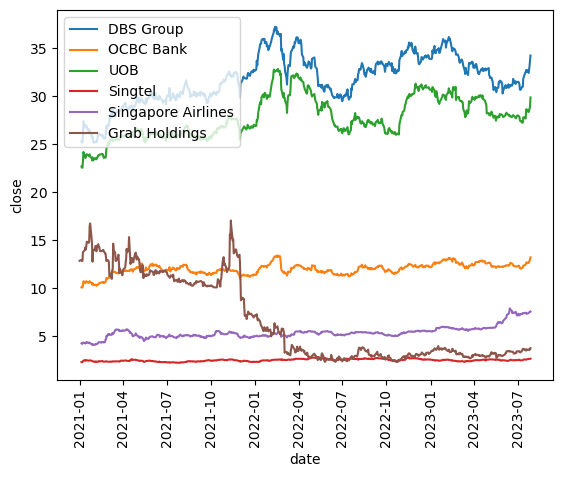

In [47]:
names = ['DBS Group', 'OCBC Bank', 'UOB', 'Singtel', 'Singapore Airlines', 'Grab Holdings']
df_stock['date'] = pd.to_datetime(df_stock['date'])
sns.lineplot(x='date', y='close', hue='name', data=df_stock[df_stock['name'].isin(names)])
#set xticks every month
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.savefig('stock.png', dpi=300, bbox_inches='tight')

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_52024\347013136.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_52024\347013136.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_52024\347013136.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Concyclics\AppData\Loc

<Axes: xlabel='date', ylabel='close'>

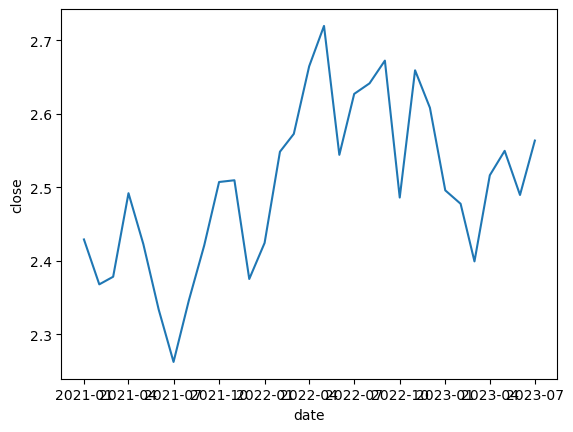

In [22]:
#plot stock price of DBS Group monthly mean
name = 'Singtel'
df_stock_ = df_stock[df_stock['name'] == name]
df_stock_.drop(['name'], axis=1, inplace=True)
df_stock_.drop(['symbol'], axis=1, inplace=True)
df_stock_['date'] = pd.to_datetime(df_stock_['date'])
df_stock_['date'] = df_stock_['date'].dt.strftime('%Y-%m')
df_stock_ = df_stock_.groupby('date').mean().reset_index()
df_stock_['date'] = pd.to_datetime(df_stock_['date'])
df_stock_ = df_stock_.sort_values(by=['date'])
sns.lineplot(x='date', y='close', data=df_stock_)


In [7]:
df_coe

,year,category,month,bidding,price,quota,bids,date
0,2023,a,july,2,95202,581,728,2023-07-01
1,2023,a,july,1,97000,588,756,2023-07-01
2,2023,a,june,2,96206,586,751,2023-06-01
3,2023,a,june,1,98001,581,881,2023-06-01
4,2023,a,may,2,92000,596,936,2023-05-01
...,...,...,...,...,...,...,...,...
243,2021,e,march,1,47001,296,450,2021-03-01
244,2021,e,february,2,47506,304,503,2021-02-01
245,2021,e,february,1,49778,300,435,2021-02-01
246,2021,e,january,2,51900,466,705,2021-01-01


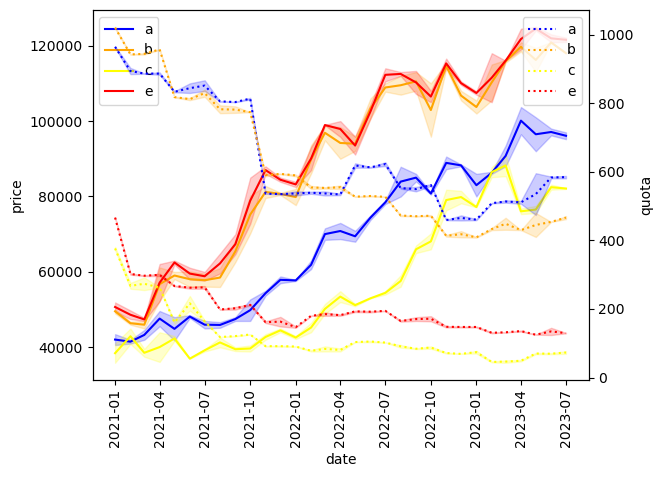

In [45]:

sns.lineplot(data=df_coe[df_coe['category'] == 'a'], x="date", y="price", color='blue', label='a')
sns.lineplot(data=df_coe[df_coe['category'] == 'b'], x="date", y="price", color='orange', label='b')
sns.lineplot(data=df_coe[df_coe['category'] == 'c'], x="date", y="price", color='yellow', label='c')
sns.lineplot(data=df_coe[df_coe['category'] == 'e'], x="date", y="price", color='red', label='e')
plt.xticks(rotation=90)
#set quota as right y-axis
# set line style as --
ax2 = plt.twinx()
sns.lineplot(data=df_coe[df_coe['category'] == 'a'], x="date", y="quota", ls=':', ax=ax2, color='blue', label='a')
sns.lineplot(data=df_coe[df_coe['category'] == 'b'], x="date", y="quota", ls=':', ax=ax2, color='orange', label='b')
sns.lineplot(data=df_coe[df_coe['category'] == 'c'], x="date", y="quota", ls=':', ax=ax2, color='yellow', label='c')
sns.lineplot(data=df_coe[df_coe['category'] == 'e'], x="date", y="quota", ls=':', ax=ax2, color='red', label='e')
plt.xticks(rotation=90)
plt.savefig('coe.png', dpi=300, bbox_inches='tight')

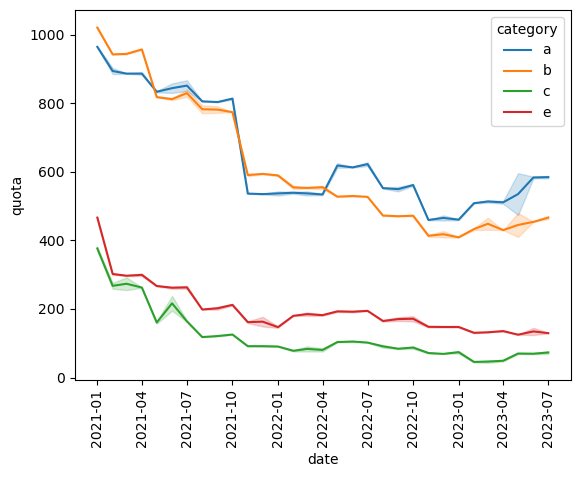

In [7]:
sns.lineplot(data=df_coe, x="date", y="quota", hue="category")
plt.xticks(rotation=90)
plt.savefig('coe_quota.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='date', ylabel='bids'>

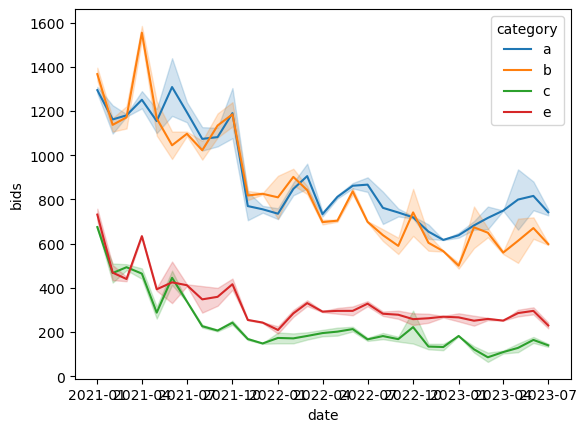

In [10]:
sns.lineplot(data=df_coe, x="date", y="bids", hue="category")